In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt

Text(0, 0.5, 'Concentration')

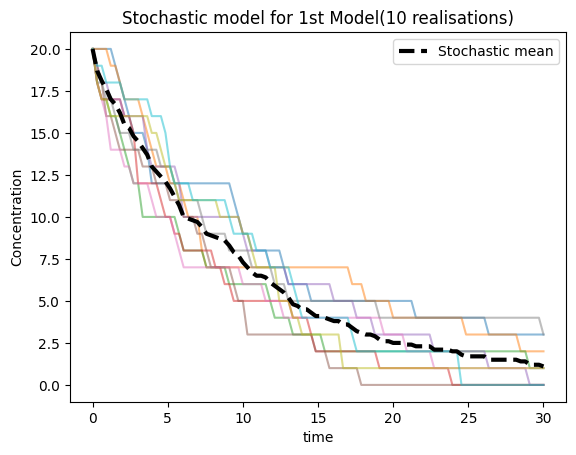

In [129]:
T_max=30
nTraj,nInterp=[10,100]
A,A_interp=20,np.zeros((nTraj,nInterp))
ts=np.linspace(0,T_max,nInterp)

for i in range(0,nTraj):
    k,dt,T_max=0.1,0.005,30
    t,A=0,20
    A_local,T_local=[A],[0]
    while(t<T_max):
        r= np.random.rand()
        if(r<A*k*dt):
            A=A-1
        t=t+dt
        A_local.append(A)    
        T_local.append(t)
    A_interp[i]= np.round(np.interp(ts,T_local,A_local)).astype(int)


A_avg= np.mean(A_interp, axis=0)
for i in range(0, nTraj):
    plt.plot(ts,A_interp[i], alpha=0.5)

plt.plot(ts,A_avg,color='black',linestyle='--',linewidth=3,label='Stochastic mean')
plt.legend()
plt.title("Stochastic model for 1st Model(10 realisations)")
plt.xlabel("time")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

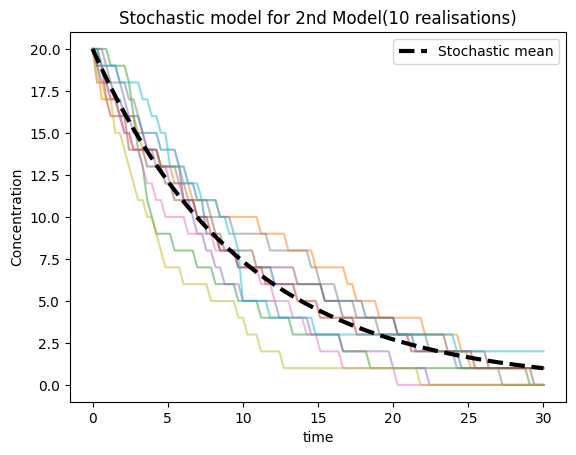

In [131]:

nTraj,nInterp,A_0=[10,100,20]
A,A_interp=A_0,np.zeros((nTraj,nInterp))
ts=np.linspace(0,T_max,nInterp)

for i in range(0,nTraj):
    k,T_max=0.1,30
    t,A=0,20
    A_local,T_local=[A],[0]
    while(A>0):
        r= np.random.rand()
        dt= (1/(A*k))*(math.log(1/r))
        t=t+dt
        A=A-1
        A_local.append(A)    
        T_local.append(t)
    A_interp[i]= np.round(np.interp(ts,T_local,A_local)).astype(int)

# A_avg= np.mean(A_interp, axis=0)
A_avg= A_0*np.exp(-k*ts)

for i in range(0, nTraj):
    plt.plot(ts,A_interp[i], alpha=0.5)
plt.plot(ts,A_avg,color='black',linestyle='--',linewidth=3, label='Stochastic mean')
plt.legend()
plt.title("Stochastic model for 2nd Model(10 realisations)")
plt.xlabel("time")
plt.ylabel("Concentration")


Text(0, 0.5, 'Concentration')

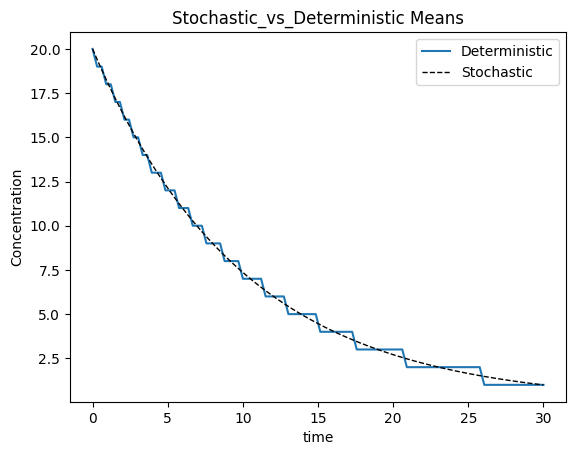

In [120]:
time_scale,t,dt=6000,0,0.005
time=[0]
A_n,k=np.zeros(time_scale),0.1
A_n[0]=20

for i in range(0, time_scale-1):
    dA_dt= -k*A_n[i]
    A_n[i+1]= A_n[i]+ dA_dt*dt
    t=t+dt
    time.append(t)

nInterp=100
ts= np.linspace(0,30,nInterp)
C_det= np.round(np.interp(ts,time,A_n)).astype(int)
plt.plot(ts,C_det, label='Deterministic')
plt.plot(ts,A_avg,color='black',linestyle='--',linewidth=1, label='Stochastic')
plt.legend()
plt.title("Stochastic_vs_Deterministic Means")
plt.xlabel("time")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

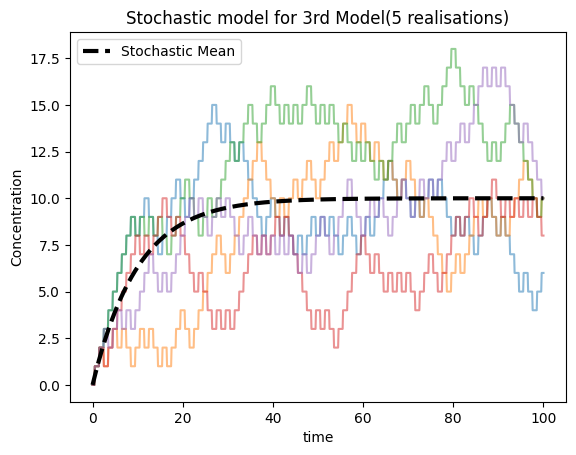

In [126]:
nTraj,nInterp=[5,1000]
Tmax=100
A_traj,ts=np.zeros((nTraj, nInterp)), np.linspace(0,Tmax,nInterp)

for i in range(0, nTraj):
    A, A_local=0,[0]
    t,T_local=0,[0]
    k1,k2=0.1,1
    while(t<Tmax):
        r1,r2= np.random.rand(2)
        rates= [A*k1,k2]
        rate_net=np.sum(rates)

        dt= (1/(rate_net))*(math.log(1/r1))
        if(rate_net*r2<k2):
            A=A+1
        else:
            A=A-1
        t=t+1
        A_local.append(A)
        T_local.append(t)
    A_traj[i]= np.round(np.interp(ts,T_local,A_local)).astype(int)

A_avg= np.mean(A_traj, axis=0)
A_avg= (k2/k1)*(1-np.exp(-k1*ts))

for i in range(0, nTraj):
    plt.plot(ts,A_traj[i], alpha=0.5)

plt.plot(ts,A_avg,color='black',linestyle='--',linewidth=3, label='Stochastic Mean')
plt.legend()
plt.title("Stochastic model for 3rd Model(5 realisations)")
plt.xlabel("time")
plt.ylabel("Concentration")

(0.0, 25.0)

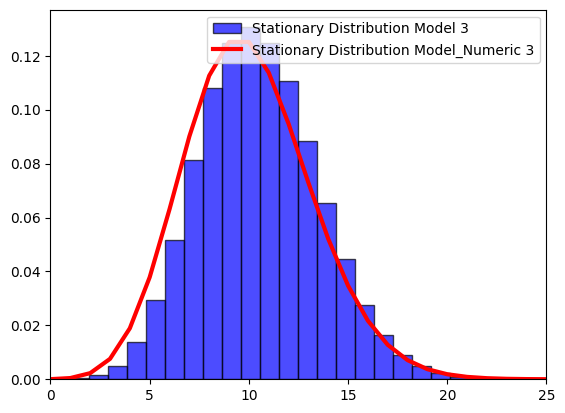

In [128]:
nTraj,nInterp=[5,1000]
A, A_local=0,[0]
t,T_local=0,[0]
k1,k2=0.1,1
Tmax=10**5
while(t<Tmax):
    r1,r2= np.random.rand(2)
    rates= [A*k1,k2]
    rate_net=np.sum(rates)

    dt= (1/(rate_net))*(math.log(1/r1))
    if(rate_net*r2<k2):
        A=A+1
    else:
        A=A-1
    t=t+1
    A_local.append(A)
    T_local.append(t)


H= np.zeros(Tmax)
X_arr= np.linspace(0,Tmax,Tmax)
r=(k2/k1)
H[0],H[1]=1,10

for n in range(1, Tmax-1):
    H[n+1]= (k1*H[n]*n+ k2*H[n]- k2*H[n-1])/(k1*(n+1))
H=H/np.sum(H)


A_local=np.array(A_local)
plt.hist(A_local,density=True,color='blue', alpha=0.7, edgecolor='black',bins=25, label='Stationary Distribution Model 3')
plt.plot(X_arr,H, color='Red', linewidth=3,label='Stationary Distribution Model_Numeric 3')
plt.legend()

plt.xlim(0,25)